In [34]:
import pandas as pd

#### Uploading the .csv files

Uploading article1.csv dataset

In [35]:
df1 = pd.read_csv('/Users/gamingspectrum24/Documents/PRG/Projects/SummaEase-Text-And-Speech-Summarizer-using-LLM/Data/articles1.csv')

Uploading article2.csv dataset

In [36]:
df2 = pd.read_csv('/Users/gamingspectrum24/Documents/PRG/Projects/SummaEase-Text-And-Speech-Summarizer-using-LLM/Data/articles2.csv')

Uploading article3.csv dataset

In [37]:
df3 = pd.read_csv('/Users/gamingspectrum24/Documents/PRG/Projects/SummaEase-Text-And-Speech-Summarizer-using-LLM/Data/articles3.csv')

In [38]:
print(df1.columns == df2.columns)
print(df2.columns == df3.columns)
print(df1.columns == df3.columns)

[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]


#### Merging all of the datasets into one so we can perform the text summarization later on

In [39]:
d = [df1, df2, df3]
df = pd.concat(d, keys = ['x', 'y', 'z'])
df.rename(columns = {'content' : 'article'}, inplace = True);
df.shape

(142570, 10)

In [40]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df

id                                              title  \
x 0       17283  House Republicans Fret About Winning Their Hea...   
  1       17284  Rift Between Officers and Residents as Killing...   
  2       17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
  3       17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
  4       17287  Kim Jong-un Says North Korea Is Preparing to T...   
...         ...                                                ...   
z 42566  218078  An eavesdropping Uber driver saved his 16-year...   
  42567  218079  Plane carrying six people returning from a Cav...   
  42568  218080  After helping a fraction of homeowners expecte...   
  42569  218081  Yes, this is real: Michigan just banned bannin...   
  42570  218082  What happened in Washington state after voters...   

             publication                         author        date    year  \
x 0       New York Times                     Carl Hulse  2016-12-31  2016.0   
  1       New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0   
  2       New York Times                   Margalit Fox  2017-01-06  2017.0   
  3       New York Times               William McDonald  2017-04-10  2017.0   
  4       New York Times                  Choe Sang-Hun  2017-01-02  2017.0   
...                  ...                            ...         ...     ...   
z 42566  Washington Post                       Avi Selk  2016-12-30  2016.0   
  42567  Washington Post                  Sarah Larimer  2016-12-30  2016.0   
  42568  Washington Post                    Renae Merle  2016-12-30  2016.0   
  42569  Washington Post                 Chelsea Harvey  2016-12-30  2016.0   
  42570  Washington Post           Christopher Ingraham  2016-12-29  2016.0   

         month                                                url  \
x 0       12.0                                                NaN   
  1        6.0                                                NaN   
  2        1.0                                                NaN   
  3        4.0                                                NaN   
  4        1.0                                                NaN   
...        ...                                                ...   
z 42566   12.0  https://web.archive.org/web/20161231004909/htt...   
  42567   12.0  https://web.archive.org/web/20161231004909/htt...   
  42568   12.0  https://web.archive.org/web/20161231004909/htt...   
  42569   12.0  https://web.archive.org/web/20161231004909/htt...   
  42570   12.0  https://web.archive.org/web/20161231004909/htt...   

                                                   article  
x 0      WASHINGTON  —   Congressional Republicans have...  
  1      After the bullet shells get counted, the blood...  
  2      When Walt Disney’s “Bambi” opened in 1942, cri...  
  3      Death may be the great equalizer, but it isn’t...  
  4      SEOUL, South Korea  —   North Korea’s leader, ...  
...                                                    ...  
z 42566           Uber driver Keith Avila picked up a p...  
  42567           Crews on Friday continued to search L...  
  42568       When the Obama administration announced a...  
  42569       This story has been updated. A new law in...  
  42570       The nation’s first recreational marijuana...  

[142570 rows x 9 columns]

Now, that we have the necessary data in the dataframe df, we will convert all of that into unstructured format

In [41]:
title_text = "".join(article for article in df.article)
data_preprocessed = title_text[:100000]

In [48]:
# For macos
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gamingspectrum24/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gamingspectrum24/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
tokenized_words = word_tokenize(data_preprocessed)
stop_words = set(stopwords.words("english"))
filtered_words = [word.lower() for word in tokenized_words if word.lower() not in stop_words and word not in string.punctuation and not word.isdigit()]

print("After tokenization, stopword removal, punctuation and special character removal:")
print(filtered_words)

After tokenization, stopword removal, punctuation and special character removal:
['washington', '—', 'congressional', 'republicans', 'new', 'fear', 'comes', 'health', 'care', 'lawsuit', 'obama', 'administration', 'might', 'win', 'incoming', 'trump', 'administration', 'could', 'choose', 'longer', 'defend', 'executive', 'branch', 'suit', 'challenges', 'administration', '’', 'authority', 'spend', 'billions', 'dollars', 'health', 'insurance', 'subsidies', 'americans', 'handing', 'house', 'republicans', 'big', 'victory', 'issues', 'sudden', 'loss', 'disputed', 'subsidies', 'could', 'conceivably', 'cause', 'health', 'care', 'program', 'implode', 'leaving', 'millions', 'people', 'without', 'access', 'health', 'insurance', 'republicans', 'prepared', 'replacement', 'could', 'lead', 'chaos', 'insurance', 'market', 'spur', 'political', 'backlash', 'republicans', 'gain', 'full', 'control', 'government', 'stave', 'outcome', 'republicans', 'could', 'find', 'awkward', 'position', 'appropriating', 'hu

In [51]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
stemmed_words = [porter_stemmer.stem(word) for word in filtered_words]
lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]

print("After stemming:")
print(stemmed_words)
print("After lemmatization:")
print(lemmatized_words)


After stemming:
['washington', '—', 'congression', 'republican', 'new', 'fear', 'come', 'health', 'care', 'lawsuit', 'obama', 'administr', 'might', 'win', 'incom', 'trump', 'administr', 'could', 'choos', 'longer', 'defend', 'execut', 'branch', 'suit', 'challeng', 'administr', '’', 'author', 'spend', 'billion', 'dollar', 'health', 'insur', 'subsidi', 'american', 'hand', 'hous', 'republican', 'big', 'victori', 'issu', 'sudden', 'loss', 'disput', 'subsidi', 'could', 'conceiv', 'caus', 'health', 'care', 'program', 'implod', 'leav', 'million', 'peopl', 'without', 'access', 'health', 'insur', 'republican', 'prepar', 'replac', 'could', 'lead', 'chao', 'insur', 'market', 'spur', 'polit', 'backlash', 'republican', 'gain', 'full', 'control', 'govern', 'stave', 'outcom', 'republican', 'could', 'find', 'awkward', 'posit', 'appropri', 'huge', 'sum', 'temporarili', 'prop', 'obama', 'health', 'care', 'law', 'anger', 'conserv', 'voter', 'demand', 'end', 'law', 'year', 'anoth', 'twist', 'donald', 'j.',

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_frequency = nltk.FreqDist(lemmatized_words)

print("Top 20 words by frequency:")
print(word_frequency.most_common(20))

Top 20 words by frequency:
[('’', 233), ('“', 193), ('”', 193), ('said', 124), ('mr.', 112), ('—', 80), ('year', 74), ('weight', 62), ('precinct', 60), ('people', 55), ('ms.', 55), ('one', 47), ('new', 44), ('detective', 44), ('time', 37), ('wong', 37), ('could', 34), ('police', 34), ('officer', 34), ('day', 34)]


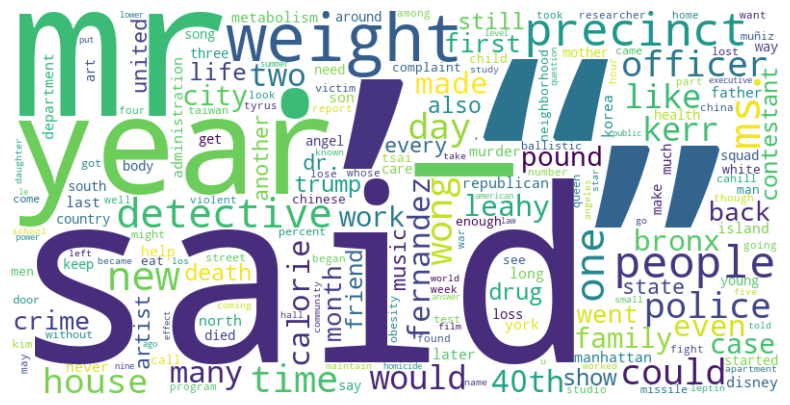

In [53]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Generating data after preprocessing

In [54]:
output_file_path = "/Users/gamingspectrum24/Documents/PRG/Projects/SummaEase-Text-And-Speech-Summarizer-using-LLM/Data/train.txt"
with open(output_file_path, 'w') as file:
    file.write(' '.join(lemmatized_words))